# Research for telecom operator Megaline

The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget. 
In this research I will carry out a preliminary analysis of the plans based on a relatively small of 500 clients. 
stages of analysis:
1. preprocessing and exploratory all data files
2. mergning the data sets into one data 
3. claculate the clients revenue
4. descriptive statistics of the data
5. hypothesis testing
6. Based on the datasets given to me, I will try to determine which prepaid plans bring more revenue and if there is a different behavior between the clients 

# 1. Preprocessing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


In [2]:
try:
    data_calls= pd.read_csv('/datasets/megaline_calls.csv') 
    data_internet= pd.read_csv('/datasets/megaline_internet.csv') 
    data_sms= pd.read_csv('/datasets/megaline_messages.csv')
    data_plans= pd.read_csv('/datasets/megaline_plans.csv') 
    data_users= pd.read_csv('/datasets/megaline_users.csv')
except:
    data_calls= pd.read_csv('megaline_calls.csv') 
    data_internet= pd.read_csv('megaline_internet.csv') 
    data_sms= pd.read_csv('megaline_messages.csv')
    data_plans= pd.read_csv('megaline_plans.csv') 
    data_users= pd.read_csv('megaline_users.csv')


In [3]:
data_calls.head()
#first I'm checking the calls dataset

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
data_calls.isnull().sum()
#there is no missing values

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [5]:
data_calls.describe(include='all')
# we can notice that there is 0 value in duration column

,id,user_id,call_date,duration
count,137735,137735.000000,137735,137735.000000
unique,137735,NaN,351,NaN
top,1231_161,NaN,2018-12-27,NaN
freq,1,NaN,1091,NaN
mean,NaN,1247.658046,NaN,6.745927
std,NaN,139.416268,NaN,5.839241
min,NaN,1000.000000,NaN,0.000000
25%,NaN,1128.000000,NaN,1.290000
50%,NaN,1247.000000,NaN,5.980000
75%,NaN,1365.000000,NaN,10.690000


In [6]:
data_calls.duration= np.ceil(data_calls.duration)
# I'm rounding up the minutes to an integer number 

In [7]:
data_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


In [8]:
pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
#changing the date to a datetime format

0        2018-12-27
1        2018-12-27
2        2018-12-27
3        2018-12-28
4        2018-12-30
            ...    
137730   2018-11-21
137731   2018-10-20
137732   2018-09-21
137733   2018-10-10
137734   2018-12-29
Name: call_date, Length: 137735, dtype: datetime64[ns]

In [9]:
data_calls['month']= pd.DatetimeIndex(data_calls['call_date']).month
#creating a new column for month so later I will use it to group the duration by month

In [10]:
data_calls[data_calls['duration'] == 0 ]
#As I already noticed there is zero in duration. I'm guessing the zero indicating a missing call
#made and registered in the call log. Because I'm summing the duration and grouping by month
#I don't mind to keep those values

,id,user_id,call_date,duration,month
19,1001_4,1001,2018-12-05,0.0,12
25,1001_13,1001,2018-12-24,0.0,12
31,1001_30,1001,2018-10-17,0.0,10
32,1001_31,1001,2018-11-03,0.0,11
34,1001_35,1001,2018-12-21,0.0,12
...,...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0,11
137715,1499_184,1499,2018-09-15,0.0,9
137720,1499_189,1499,2018-12-27,0.0,12
137722,1499_191,1499,2018-12-24,0.0,12


In [11]:
calls_grp= data_calls.groupby(['user_id','month'])['duration'].sum()
calls_grp= calls_grp.to_frame()

In [12]:
calls_grp.head(10)

duration
user_id month          
1000    12        124.0
1001    8         182.0
        9         315.0
        10        393.0
        11        426.0
        12        412.0
1002    10         59.0
        11        386.0
        12        384.0
1003    12       1104.0

In [13]:
data_internet.head()
#next is the internet data usage. As we can see we need to convert the mb to gb. but after the grouping

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [14]:
data_internet.info()
#no null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [15]:
pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
#same like I did in calls dataset. I'm converting the date format

0        2018-12-29
1        2018-12-31
2        2018-12-28
3        2018-12-26
4        2018-12-27
            ...    
104820   2018-10-20
104821   2018-12-30
104822   2018-09-22
104823   2018-12-07
104824   2018-12-24
Name: session_date, Length: 104825, dtype: datetime64[ns]

In [16]:
data_internet['month']= pd.DatetimeIndex(data_internet['session_date']).month
# adding month column

In [17]:
internet_grp= data_internet.groupby(['user_id','month'])['mb_used'].sum()
internet_grp= internet_grp.to_frame()
internet_grp
#grouping as requested by user_id the gb usage per month

mb_used
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30
...                 ...
1498    12     23137.69
1499    9      12984.76
        10     19492.43
        11     16813.83
        12     22059.21

[2277 rows x 1 columns]

In [18]:
internet_grp['mb_used']= internet_grp['mb_used']/ 1024 
internet_grp.head(10)
# 1024 mb= 1 gb

mb_used
user_id month           
1000    12      1.856904
1001    8       6.756982
        9      13.002754
        10     21.807119
        11     18.070605
        12     18.915215
1002    10      6.398447
        11     18.891680
        12     14.058828
1003    12     26.410293

In [19]:
internet_grp['gb_used']= internet_grp['mb_used'].apply(np.ceil).astype('int')
internet_grp.head()
#rounding up the gb usage and changing the type to 'int'

mb_used  gb_used
user_id month                    
1000    12      1.856904        2
1001    8       6.756982        7
        9      13.002754       14
        10     21.807119       22
        11     18.070605       19

In [20]:
data_sms.head()
#Each message date equal to one message sent

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [21]:
data_sms.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [22]:
pd.to_datetime(data_sms['message_date'], format='%Y-%m-%d')
#date format

0       2018-12-27
1       2018-12-31
2       2018-12-31
3       2018-12-27
4       2018-12-26
           ...    
76046   2018-12-24
76047   2018-12-24
76048   2018-12-31
76049   2018-12-24
76050   2018-12-23
Name: message_date, Length: 76051, dtype: datetime64[ns]

In [23]:
data_sms['month']= pd.DatetimeIndex(data_sms['message_date']).month

In [24]:
sms_grp= data_sms.groupby(['user_id','month'])['id'].count()
sms_grp= sms_grp.to_frame()
sms_grp= sms_grp.rename(columns={'id':'sms'}).reset_index()
sms_grp.head(10)
#As requested I grouped by user id the overall sms sent in each month 

,user_id,month,sms
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
5,1001,12,44
6,1002,10,15
7,1002,11,32
8,1002,12,41
9,1003,12,50


In [25]:
total= pd.merge(left= calls_grp, right= internet_grp, how='outer', on=('user_id','month'))
total
#starting to merge the different data to one based on user_id and month

duration    mb_used  gb_used
user_id month                              
1000    12        124.0   1.856904      2.0
1001    8         182.0   6.756982      7.0
        9         315.0  13.002754     14.0
        10        393.0  21.807119     22.0
        11        426.0  18.070605     19.0
...                 ...        ...      ...
1311    6           NaN   1.463701      2.0
1349    10          NaN  12.786670     13.0
        11          NaN  16.726816     17.0
        12          NaN  12.734287     13.0
1361    5           NaN   1.484072      2.0

[2292 rows x 3 columns]

In [26]:
total2= pd.merge(left= total, right= sms_grp, how='outer', on=('user_id','month')).fillna(0).reset_index()

total2

,index,user_id,month,duration,mb_used,gb_used,sms
0,0,1000,12,124.0,1.856904,2.0,11.0
1,1,1001,8,182.0,6.756982,7.0,30.0
2,2,1001,9,315.0,13.002754,14.0,44.0
3,3,1001,10,393.0,21.807119,22.0,53.0
4,4,1001,11,426.0,18.070605,19.0,36.0
...,...,...,...,...,...,...,...
2288,2288,1349,10,0.0,12.786670,13.0,76.0
2289,2289,1349,11,0.0,16.726816,17.0,72.0
2290,2290,1349,12,0.0,12.734287,13.0,61.0
2291,2291,1361,5,0.0,1.484072,2.0,2.0


In [27]:
users_grp= data_users[['user_id', 'plan']]
users_grp
#this data contain the pre paid plan for each user. It will help me to calculate the revenue

,user_id,plan
0,1000,ultimate
1,1001,surf
2,1002,surf
3,1003,surf
4,1004,surf
...,...,...
495,1495,surf
496,1496,surf
497,1497,ultimate
498,1498,surf


In [28]:
merged_data=pd.merge(left=total2, right=users_grp, how='inner', on=('user_id'))
merged_data
#final data merged

,index,user_id,month,duration,mb_used,gb_used,sms,plan
0,0,1000,12,124.0,1.856904,2.0,11.0,ultimate
1,1,1001,8,182.0,6.756982,7.0,30.0,surf
2,2,1001,9,315.0,13.002754,14.0,44.0,surf
3,3,1001,10,393.0,21.807119,22.0,53.0,surf
4,4,1001,11,426.0,18.070605,19.0,36.0,surf
...,...,...,...,...,...,...,...,...
2288,2284,1204,11,0.0,20.846631,21.0,42.0,ultimate
2289,2285,1204,12,0.0,35.869189,36.0,78.0,ultimate
2290,2288,1349,10,0.0,12.786670,13.0,76.0,surf
2291,2289,1349,11,0.0,16.726816,17.0,72.0,surf


In [29]:
#changing to integer so the data will be more readable
merged_data.gb_used= merged_data.gb_used.astype('int')
merged_data.sms= merged_data.sms.astype('int')
merged_data.duration= merged_data.duration.astype('int')
merged_data.head()

,index,user_id,month,duration,mb_used,gb_used,sms,plan
0,0,1000,12,124,1.856904,2,11,ultimate
1,1,1001,8,182,6.756982,7,30,surf
2,2,1001,9,315,13.002754,14,44,surf
3,3,1001,10,393,21.807119,22,53,surf
4,4,1001,11,426,18.070605,19,36,surf


In [30]:
data_plans
#These is the information and monthly charge for each plan

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [31]:
# Im creating a function that will check every user and calculate their revenue depending on plan and exceeding taarif
def cost(row):
    plan= row['plan']
    minutes= row['duration']
    gb= row['gb_used']
    sms= row['sms']
    
    if plan == 'surf':
        cost_plan= 20
    else:
        cost_plan= 70
        
    if minutes > 500 and plan== 'surf':
        cost_minutes= ((minutes-500)*0.03)
    elif minutes > 3000 and plan== 'ultimate':
        cost_minutes= ((minutes- 3000)*0.01)
    else:
        cost_minutes= 0
        
    if gb > 15 and plan=='surf':
        gb_cost= ((gb- 15)*10)
    elif gb > 30 and plan=='ultimate':
        gb_cost = ((gb-30)*7)
    else:
        gb_cost= 0
        
    if sms > 50 and plan=='surf':
        sms_cost= ((sms- 50)*0.03)
    elif sms> 1000 and plan=='ultimate':
        sms_cost= ((sms- 1000)*0.01)
    else:
        sms_cost= 0
    
    total= cost_plan+cost_minutes+gb_cost+sms_cost
    return total 

In [32]:
merged_data['revenue']= merged_data.apply(cost, axis=1)
#implementing the function into a new column

In [33]:
merged_data.head()

,index,user_id,month,duration,mb_used,gb_used,sms,plan,revenue
0,0,1000,12,124,1.856904,2,11,ultimate,70.00
1,1,1001,8,182,6.756982,7,30,surf,20.00
2,2,1001,9,315,13.002754,14,44,surf,20.00
3,3,1001,10,393,21.807119,22,53,surf,90.09
4,4,1001,11,426,18.070605,19,36,surf,60.00


# 2. EDA
   Analyisng the distribution of the data using Histograms

In [34]:
merged_data.groupby(['plan'])['user_id'].nunique()

plan
surf        333
ultimate    157
Name: user_id, dtype: int64

In [35]:
surf= merged_data.query('plan=="surf"')
surf
#each user from the surf plan grouping by month and we can show the total duration, data usage and messages

,index,user_id,month,duration,mb_used,gb_used,sms,plan,revenue
1,1,1001,8,182,6.756982,7,30,surf,20.00
2,2,1001,9,315,13.002754,14,44,surf,20.00
3,3,1001,10,393,21.807119,22,53,surf,90.09
4,4,1001,11,426,18.070605,19,36,surf,60.00
5,5,1001,12,412,18.915215,19,44,surf,60.00
...,...,...,...,...,...,...,...,...,...
2286,2282,1194,11,0,41.861426,42,62,surf,290.36
2287,2283,1194,12,0,30.359854,31,56,surf,180.18
2290,2288,1349,10,0,12.786670,13,76,surf,20.78
2291,2289,1349,11,0,16.726816,17,72,surf,40.66


In [36]:
ultimate= merged_data.query('plan=="ultimate"')
ultimate

,index,user_id,month,duration,mb_used,gb_used,sms,plan,revenue
0,0,1000,12,124,1.856904,2,11,ultimate,70.0
19,19,1006,11,10,2.019893,3,15,ultimate,70.0
20,20,1006,12,59,31.366035,32,139,ultimate,84.0
26,26,1008,10,476,16.706045,17,21,ultimate,70.0
27,27,1008,11,446,23.121797,24,37,ultimate,70.0
...,...,...,...,...,...,...,...,...,...
2231,2226,1493,12,473,14.930752,15,0,ultimate,70.0
2247,2242,1497,12,300,10.846240,11,50,ultimate,70.0
2269,2265,1108,12,0,0.227705,1,0,ultimate,70.0
2288,2284,1204,11,0,20.846631,21,42,ultimate,70.0


In [37]:
def stat(x1,x2):
    mean_surf= surf[x1].mean()
    std_surf= surf[x1].std()
    var_surf= surf[x1].var()
    cv_surf= std_surf/mean_surf

    mean_ultimate= ultimate[x2].mean()
    std_ultimate= ultimate[x2].std()
    var_ultimate= ultimate[x2].var()
    cv_ultimate= std_ultimate/mean_ultimate

    fig, (ax1,ax2)= plt.subplots(nrows=1, ncols=2, figsize=(8,5))
    ax1.hist(surf[x1], bins=30, alpha=0.8)
    ax1.set_title('surf')
    ax2.hist(ultimate[x2], bins=30, alpha=0.8)
    ax2.set_title('ultimate')
    plt.show()
    print('surf plan average is:',mean_surf)
    print('ultimate plan average is:', mean_ultimate)
    print('surf plan Coefficient of Variation is:',cv_surf)
    print('ultimate plan Coefficient of Variation is:',cv_ultimate)
    print('surf plan dispertion is:',var_surf)
    print('ultimate plan dispertion is:', var_ultimate)
    print('surf plan std is:',std_surf)
    print('ultimate plan std is:',std_ultimate)

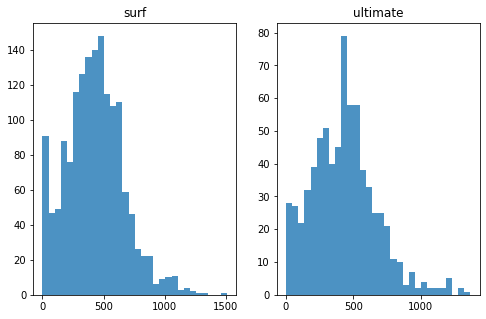

surf plan average is: 428.7495232040687
ultimate plan average is: 430.45
surf plan Coefficient of Variation is: 0.546830112062162
ultimate plan Coefficient of Variation is: 0.5587379775671537
surf plan dispertion is: 54968.27946065038
ultimate plan dispertion is: 57844.464812239225
surf plan std is: 234.4531498202794
ultimate plan std is: 240.5087624437813


In [38]:
stat('duration', 'duration')

We can see that both plan distribution has a slightly positive skeweness and most of the values compact around the mean. We can notice the outliers above 1000 minutes. 

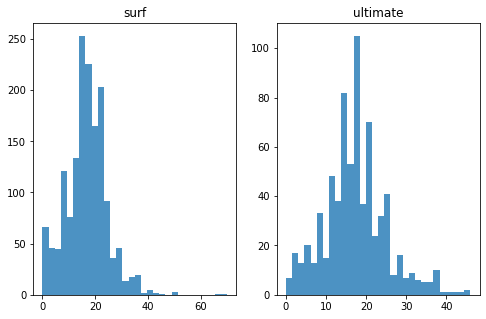

surf plan average is: 16.670692943420217
ultimate plan average is: 17.306944444444444
surf plan Coefficient of Variation is: 0.4707375943000931
ultimate plan Coefficient of Variation is: 0.44318091909187274
surf plan dispertion is: 61.58359983759012
ultimate plan dispertion is: 58.830549760469786
surf plan std is: 7.847521891501171
ultimate plan std is: 7.670107545560869


In [39]:
stat('gb_used','gb_used')

Ultimate plan has a normal distribution of internet data with high peak around the mean.
Surf plan has a noraml distribution of internet data with high peak around the mean.
Both of the plan has a low cv which indicate that distribution centred around the mean

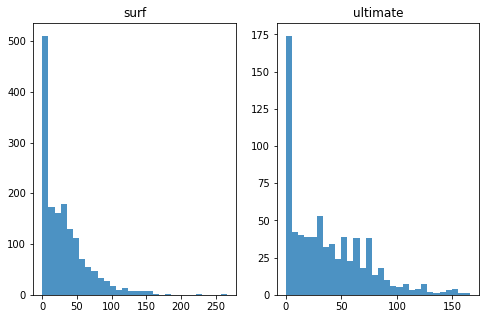

surf plan average is: 31.15956770502225
ultimate plan average is: 37.55138888888889
surf plan Coefficient of Variation is: 1.077252348021466
ultimate plan Coefficient of Variation is: 0.9258560107302188
surf plan dispertion is: 1126.7245219504066
ultimate plan dispertion is: 1208.7567435481378
surf plan std is: 33.566717473569064
ultimate plan std is: 34.76717911404573


In [40]:
stat('sms','sms')

The message distrubation for both plan has a positively skeweness 

# 3. Hypothesis


In [41]:
plan_grp= merged_data.pivot_table(index='plan', values='revenue', aggfunc=('mean','median')).reset_index()
plan_grp

,plan,mean,median
0,surf,60.706408,40.36
1,ultimate,72.313889,70.00


In [42]:
def ttest(sample1,sample2,alpha=0.05):
    p_value_levene= stats.levene(sample1, sample2).pvalue.astype(int)
    if p_value_levene<alpha:
        option_var=False
    else:
        option_var=True
    p_value=stats.ttest_ind(sample1, sample2,nan_policy='omit',equal_var=option_var).pvalue.astype(int)
    if p_value<alpha:
        print('Reject H0: average of sample 1 is not equal to average of sample 2')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 \
  and sample 2 are not the same")

In [43]:
ttest(surf['revenue'],ultimate['revenue'],alpha=0.05)

Reject H0: average of sample 1 is not equal to average of sample 2


I decided to test the two samples with t-test of independent samples. The null hypotheses is that the two samples are equal, therefore there isn't a difference between the plan's average revenue. The alternative hypotheses is that we can't prove that the samples are equal.
I decided to set the alpha on 5% and calculate if p-value is higher or lower than the alpha.

In [44]:
data_users.city.value_counts()
#looking for New-York/New-Jearsey 

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Oxnard-Thousand Oaks-Ventura, CA MSA                1
Greensboro-High Point, NC MSA                       1
Stockton, CA MSA                                    1
Raleigh-Cary, NC MSA                                1
Jacksonville, FL MSA                                1
Name: city, Length: 73, dtype: int64

In [45]:
city_revenue= data_users.query('user_id in @merged_data.user_id')


In [46]:
city_revenue_final= pd.merge(left= city_revenue, right= merged_data, how='outer', on=('user_id'))


In [47]:
city_revenue_final.groupby(['city'])('revenue').mean()

TypeError: 'DataFrameGroupBy' object is not callable

In [48]:
rest= city_revenue_final.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')
#creating sample for the H0

In [49]:
nynj= city_revenue_final.query('city== "New York-Newark-Jersey City, NY-NJ-PA MSA"')
#creating sample fot the H0

In [50]:
ttest(rest['revenue'],nynj['revenue'],alpha=0.05)

Reject H0: average of sample 1 is not equal to average of sample 2


I decided to test the two samples with t-test of independent samples. The null hypotheses is that the two samples are equal, therefore there isn't a difference between the revenue of Ny-Nj area and the rest of the states. The alternative hypotheses is that we can't prove that the samples are equal. I decided to set the alpha on 5% and calculate if p-value is higher or lower than the alpha.

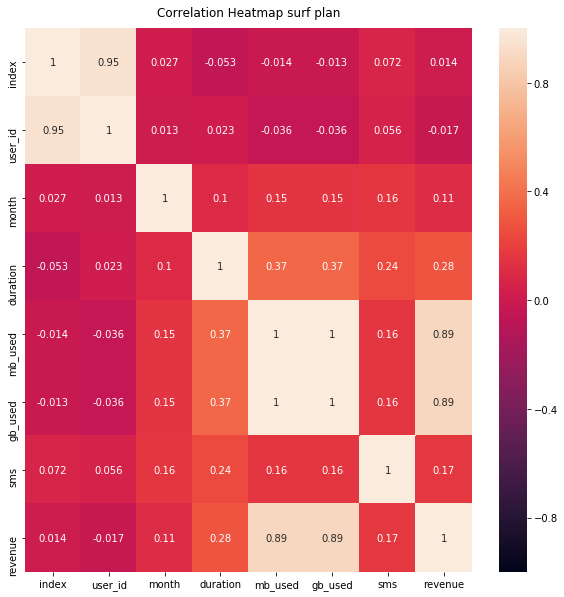

In [51]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(surf.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap surf plan', fontdict={'fontsize':12}, pad=12);

We can see the correlation between the revenue and internet data payment. many clients exceeded the limit of internet data therefore the revenue was higher 

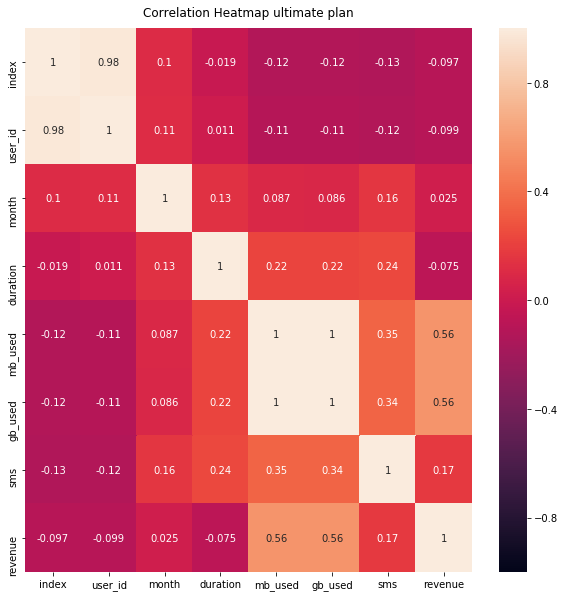

In [52]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(ultimate.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap ultimate plan', fontdict={'fontsize':12}, pad=12);

Comparing to the surf plan, this plan has not have high correlation between revenue and Gb_used. The reason is because many clients didn't exceed the plan limit and didn't pay on top of monthly charge.

# Overall conclusion

After analyize the data we can conclude a number of interesting results regarding the behavoir of clients on the two pre paid plans:
1. The average duration of calls made in both plans are similar: 428 minutes for surf and 430 ultimate.
2. The average use of internet data is similar aswell. 16 GB for surf and 17 GB for ultimate
3. The average messages sent is also similar. 31 sms for surf and 37 sms for ultimate.
4. The distribution of both plans tells us that there is a similar behavior of usage.
5. We can notice that Ultimate clients hardly exceed much from the monthly charge compare to the surf clients that exceed much more. In the heatmap correlation we can see that the high revenue in surf correlate with the high usage of internet data.
6. The average of total revenue in surf plan is 60 dollars. Three times higher from the fixed monthly charge.
7. The average of total revenue in ultimate plan is 72 dollars. 
8. In my opinion based on the data and results we can raise the price of surf and make the clients move to the ultimate plan easily and be able to use the services in the limit of the plan without exceed it.
9. As for the question where to invest more advertisment budget is in the ultimate plan due to the facts that I mentioned before.
